# LibCBM versus CBM-CFS3 Stand level testing

In [1]:
import os, json, math
import numpy as np
import pandas as pd
%matplotlib inline


libCBM related imports


In [2]:
from libcbm.test import casegeneration
from libcbm.test.cbm3support import cbm3_simulator
from libcbm.test import simulator
from libcbm.test import poolcomparison

In [3]:
age_interval=5
num_age_classes = 40 #required by cbm3
n_steps = 250
cbm3_exe_path = r"M:\CBM Tools and Development\Builds\CBMBuilds\20190530_growth_increment_fix"
toolbox_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3"
archive_index_db_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3\Admin\DBs\ArchiveIndex_Beta_Install.mdb"

cbm_defaults_db_path = 'C:\dev\cbm_defaults\cbm_defaults.db'
libcbm_path = r'C:\dev\LibCBM\LibCBM\x64\Debug\LibCBM.dll'

generate random test cases

In [4]:
cases = casegeneration.generate_scenarios(
    random_seed = 2,
    num_cases = 20,
    dbpath = 'C:\dev\cbm_defaults\cbm_defaults.db',
    n_steps=n_steps,
    max_disturbances = 3,
    max_components = 1,
    growth_generator = lambda: casegeneration.get_random_sigmoid_func,
    n_growth_digits = 2,
    age_interval=age_interval,
    max_age=age_interval*num_age_classes)


In [5]:
libcbm_result = simulator.run_libCBM(libcbm_path, cbm_defaults_db_path, cases, n_steps, spinup_debug=True)

In [6]:
project_path = cbm3_simulator.import_cbm3_project(
    name="stand_level_testing",
    cases=cases,
    age_interval=age_interval,
    num_age_classes=num_age_classes,
    nsteps=n_steps,
    cbm_exe_path=cbm3_exe_path,
    toolbox_path=toolbox_path,
    archive_index_db_path=archive_index_db_path)

cbm3_results_path = cbm3_simulator.run_cbm3(
    aidb_path=archive_index_db_path, 
    project_path=project_path,
    toolbox_path=toolbox_path,
    cbm_exe_path=cbm3_exe_path)

cbm3_result = cbm3_simulator.get_cbm3_results(cbm3_results_path)

In [7]:
pools_merged, pool_diffs = poolcomparison.join_pools(libcbm_result["pools"], cbm3_result["pools"], "all")

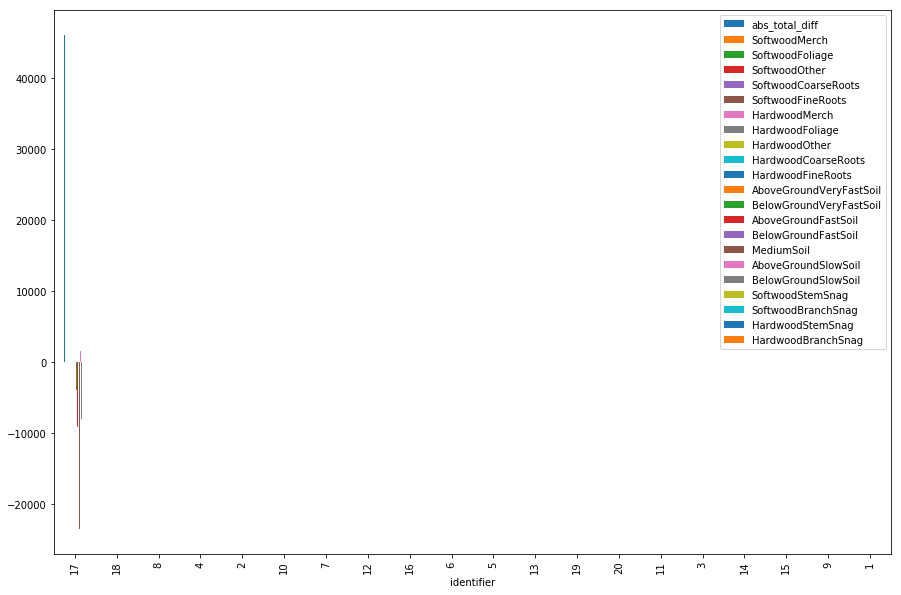

In [40]:
pool_diffs_totals = pool_diffs.drop(columns="timestep")
pool_diffs_totals \
    .groupby("identifier").sum() \
    .sort_values("abs_total_diff", ascending=False) \
    .head(20) \
    .plot(figsize=(15,10), kind="bar")

In [9]:
def plot_diff(id):
    markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
    bio_pools = pools_merged[pools_merged["identifier"]==casegeneration.get_classifier_name(id)]
    bio_pools = bio_pools.drop(columns="identifier")
    bio_pools = bio_pools.groupby("timestep").sum()
    ax = bio_pools.plot(figsize=(15,12), title=casegeneration.get_classifier_name(id))
    for i, line in enumerate(ax.get_lines()):
        line.set_marker(markers[i%len(markers)])
    ax.legend(ax.get_lines(), bio_pools.columns, loc='best')
    bio_diffs = pool_diffs[pool_diffs["identifier"]==casegeneration.get_classifier_name(id)]
    bio_diffs.drop(columns="identifier")
    bio_diffs.groupby("timestep").sum() \
        .plot(figsize=(15,12), title=casegeneration.get_classifier_name(id))

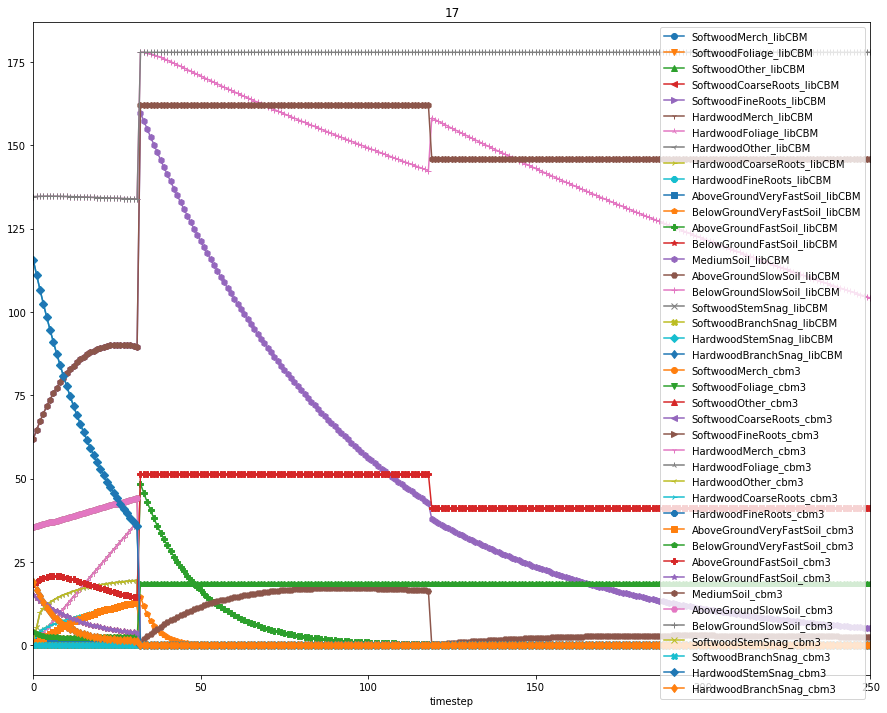

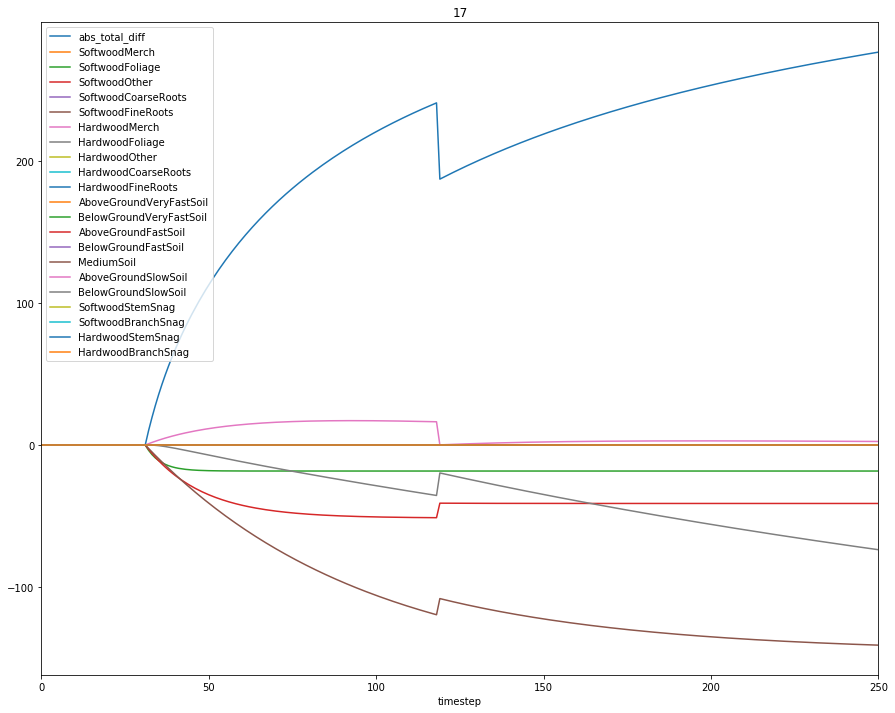

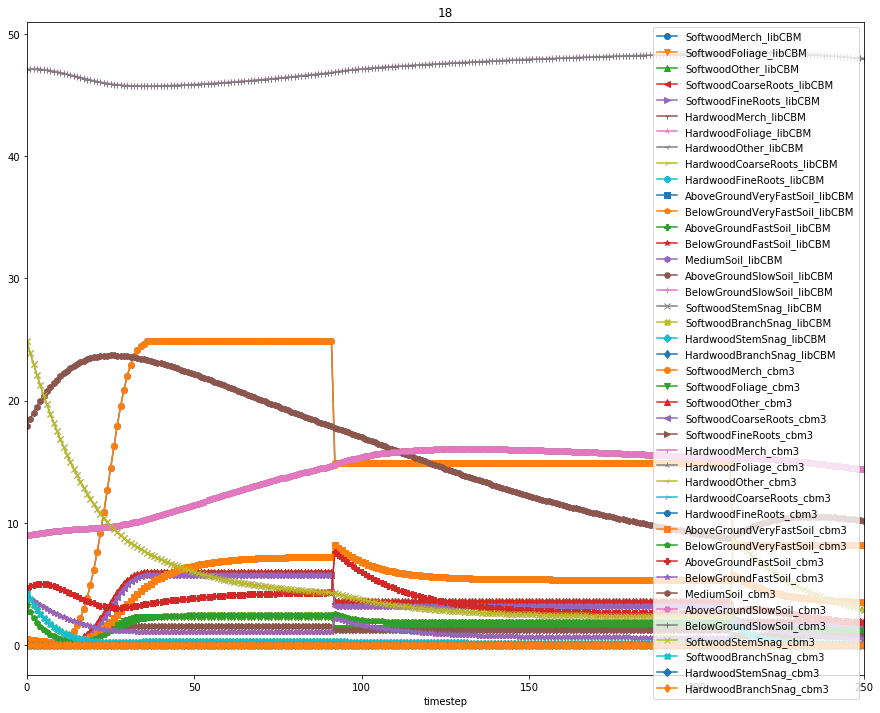

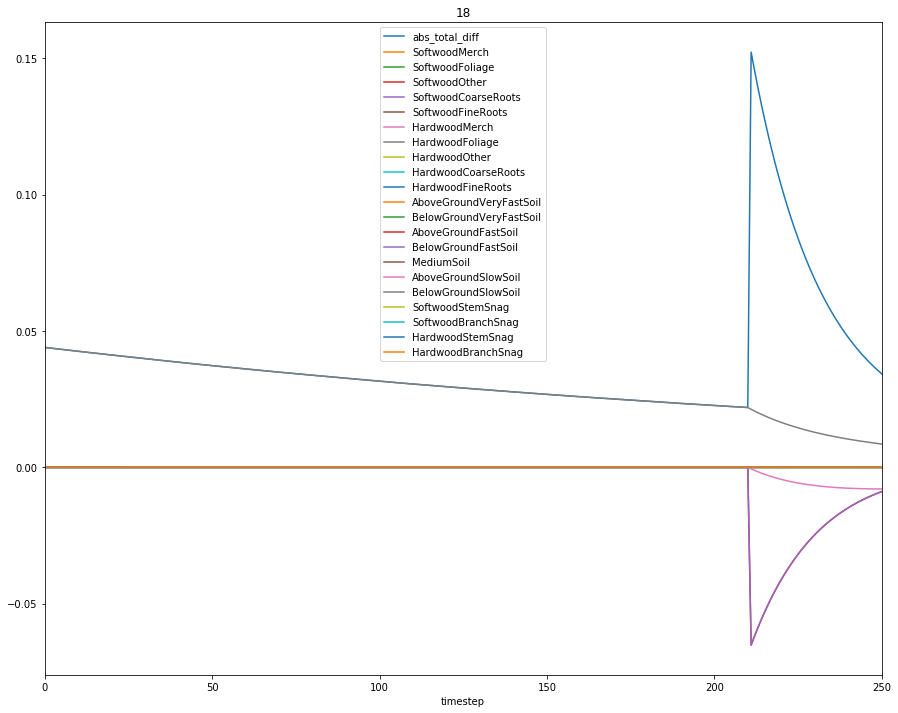

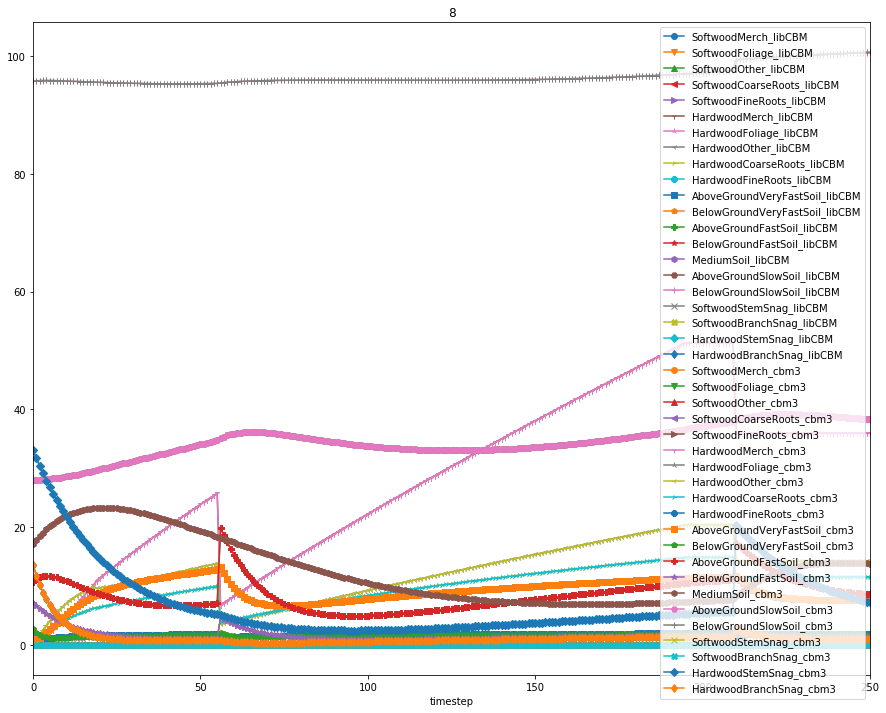

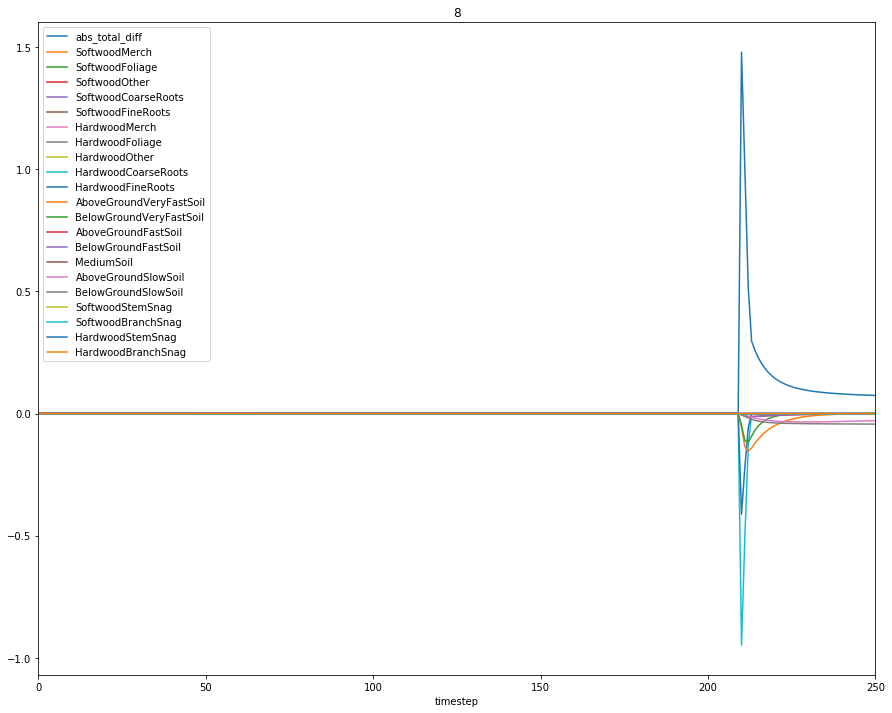

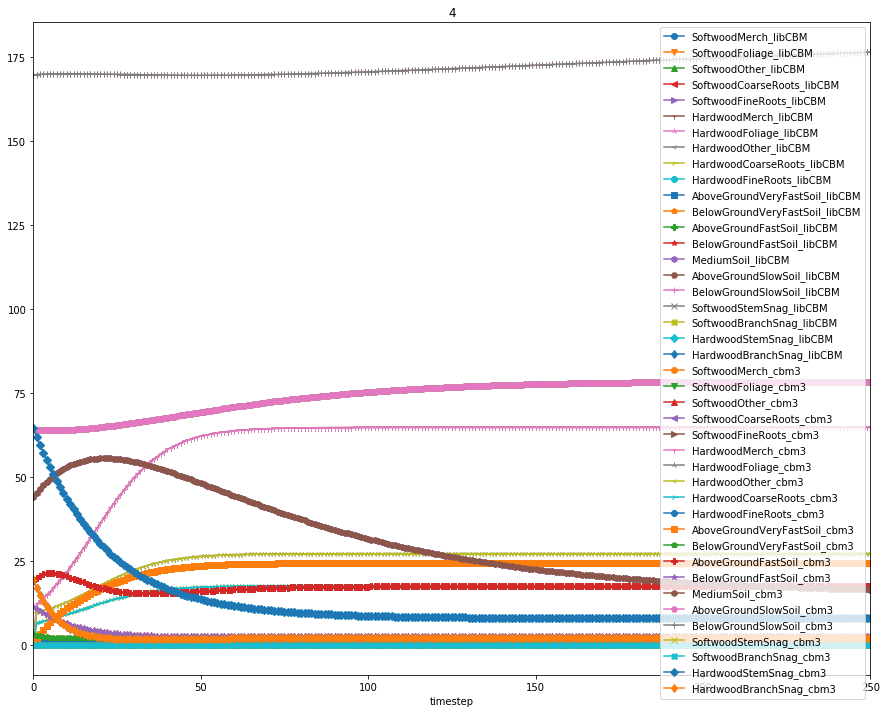

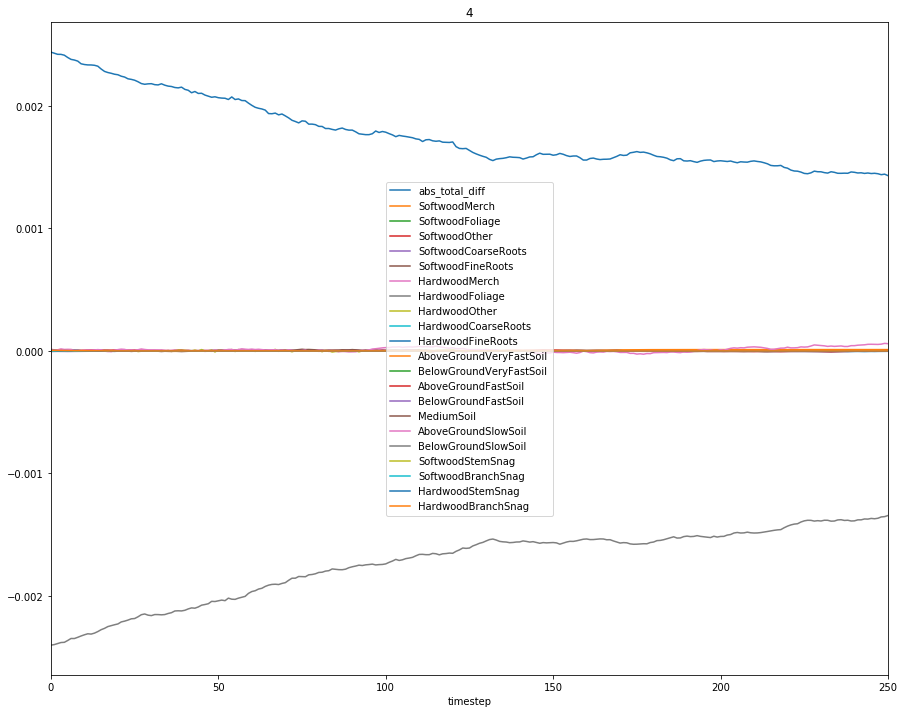

In [22]:
plot_diff(17)
plot_diff(18)
plot_diff(8)
plot_diff(4)

In [23]:
cases[17]

{'id': 18,
 'age': 0,
 'area': 1.0,
 'delay': 0,
 'unfccc_land_class': 0,
 'admin_boundary': 'Saskatchewan',
 'eco_boundary': 'Taiga Shield West',
 'historic_disturbance': 'Wildfire',
 'last_pass_disturbance': 'Wildfire',
 'components': [{'species': 'Whitebark pine',
   'age_volume_pairs': [(0, 0),
    (5, 0),
    (10, 0),
    (15, 0),
    (20, 0),
    (25, 85.24),
    (30, 85.24),
    (35, 85.24),
    (40, 85.24),
    (45, 85.24),
    (50, 85.24),
    (55, 85.24),
    (60, 85.24),
    (65, 85.24),
    (70, 85.24),
    (75, 85.24),
    (80, 85.24),
    (85, 85.24),
    (90, 85.24),
    (95, 85.24),
    (100, 85.24),
    (105, 85.24),
    (110, 85.24),
    (115, 85.24),
    (120, 85.24),
    (125, 85.24),
    (130, 85.24),
    (135, 85.24),
    (140, 85.24),
    (145, 85.24),
    (150, 85.24),
    (155, 85.24),
    (160, 85.24),
    (165, 85.24),
    (170, 85.24),
    (175, 85.24),
    (180, 85.24),
    (185, 85.24),
    (190, 85.24),
    (195, 85.24)]}],
 'events': [{'disturbance_type'

In [12]:
cases[14]

{'id': 15,
 'age': 0,
 'area': 1.0,
 'delay': 0,
 'unfccc_land_class': 0,
 'admin_boundary': 'Nunavut',
 'eco_boundary': 'Hudson Plains',
 'historic_disturbance': 'Wildfire',
 'last_pass_disturbance': 'Wildfire',
 'components': [{'species': 'Other broadleaved species - Genus type',
   'age_volume_pairs': [(0, 0),
    (5, 0),
    (10, 0),
    (15, 0),
    (20, 0),
    (25, 0),
    (30, 0),
    (35, 0),
    (40, 0),
    (45, 0),
    (50, 0),
    (55, 0),
    (60, 0),
    (65, 331.1),
    (70, 331.1),
    (75, 331.1),
    (80, 331.1),
    (85, 331.1),
    (90, 331.1),
    (95, 331.1),
    (100, 331.1),
    (105, 331.1),
    (110, 331.1),
    (115, 331.1),
    (120, 331.1),
    (125, 331.1),
    (130, 331.1),
    (135, 331.1),
    (140, 331.1),
    (145, 331.1),
    (150, 331.1),
    (155, 331.1),
    (160, 331.1),
    (165, 331.1),
    (170, 331.1),
    (175, 331.1),
    (180, 331.1),
    (185, 331.1),
    (190, 331.1),
    (195, 331.1)]}],
 'events': [{'disturbance_type': 'Generic 50% mo

In [13]:
cases[14]

{'id': 15,
 'age': 0,
 'area': 1.0,
 'delay': 0,
 'unfccc_land_class': 0,
 'admin_boundary': 'Nunavut',
 'eco_boundary': 'Hudson Plains',
 'historic_disturbance': 'Wildfire',
 'last_pass_disturbance': 'Wildfire',
 'components': [{'species': 'Other broadleaved species - Genus type',
   'age_volume_pairs': [(0, 0),
    (5, 0),
    (10, 0),
    (15, 0),
    (20, 0),
    (25, 0),
    (30, 0),
    (35, 0),
    (40, 0),
    (45, 0),
    (50, 0),
    (55, 0),
    (60, 0),
    (65, 331.1),
    (70, 331.1),
    (75, 331.1),
    (80, 331.1),
    (85, 331.1),
    (90, 331.1),
    (95, 331.1),
    (100, 331.1),
    (105, 331.1),
    (110, 331.1),
    (115, 331.1),
    (120, 331.1),
    (125, 331.1),
    (130, 331.1),
    (135, 331.1),
    (140, 331.1),
    (145, 331.1),
    (150, 331.1),
    (155, 331.1),
    (160, 331.1),
    (165, 331.1),
    (170, 331.1),
    (175, 331.1),
    (180, 331.1),
    (185, 331.1),
    (190, 331.1),
    (195, 331.1)]}],
 'events': [{'disturbance_type': 'Generic 50% mo

In [14]:
libCBM_spinup_debug[libCBM_spinup_debug["index"]==3].tail()

NameError: name 'libCBM_spinup_debug' is not defined

In [ ]:

libCBM_spinup_debug = libcbm_result["spinup_debug"]

In [ ]:
libCBM_spinup_debug[libCBM_spinup_debug["index"]==3].groupby("iteration").sum().plot(figsize=(10,10))

In [ ]:
libcbm_pools = libcbm_result["pools"]


In [15]:
libcbm_pools[libcbm_pools["identifier"]=='4'][["timestep","HardwoodMerch"]].groupby("timestep").sum().plot()

NameError: name 'libcbm_pools' is not defined

In [16]:
libcbm_pools[libcbm_pools["identifier"]=='4'][["timestep","HardwoodMerch"]].head(20)

NameError: name 'libcbm_pools' is not defined

In [17]:
cbm3_pools = cbm3_result["pools"]


In [18]:
cbm3_pools[cbm3_pools["identifier"]=='4'][["TimeStep",'Hardwood Merchantable']].head(20)

,TimeStep,Hardwood Merchantable
756,0,0.000000
757,1,12.117321
758,2,13.062294
759,3,13.992374
760,4,14.909002
761,5,15.813386
762,6,17.036015
763,7,18.239723
764,8,19.426338
765,9,20.597395


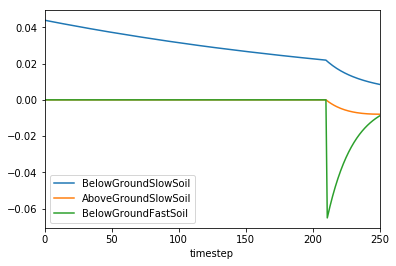

In [36]:
pool_diffs_18 = pool_diffs.loc[pool_diffs["identifier"]=='18'] 

pool_diffs_18 = pool_diffs_18.drop(columns="identifier")
pool_diffs_18[["timestep","BelowGroundSlowSoil","AboveGroundSlowSoil","BelowGroundFastSoil"]].groupby(["timestep"]).sum().plot()
    

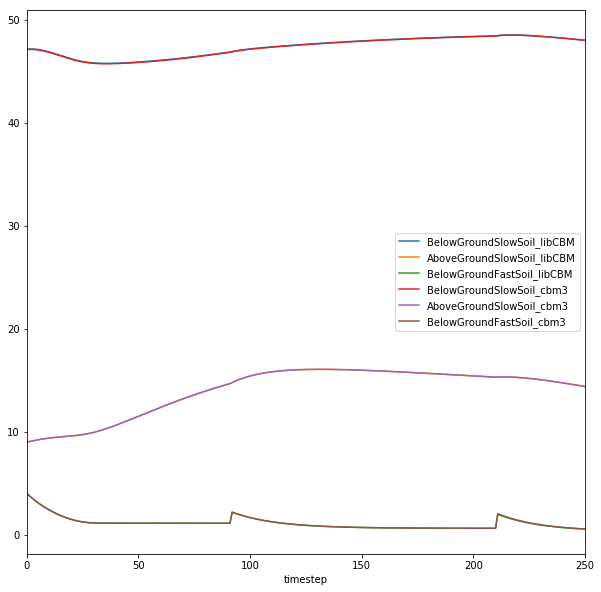

In [39]:
pools_merged_18 = pools_merged.loc[pools_merged["identifier"]=='18']

pools_merged_18 = pools_merged_18.drop(columns="identifier")

pools_merged_18[["timestep", "BelowGroundSlowSoil_libCBM","AboveGroundSlowSoil_libCBM","BelowGroundFastSoil_libCBM",
                "BelowGroundSlowSoil_cbm3","AboveGroundSlowSoil_cbm3","BelowGroundFastSoil_cbm3"]] \
    .groupby(["timestep"]).sum().plot(figsize=(10,10))

In [21]:

list(pools_merged)

['identifier',
 'timestep',
 'SoftwoodMerch_libCBM',
 'SoftwoodFoliage_libCBM',
 'SoftwoodOther_libCBM',
 'SoftwoodCoarseRoots_libCBM',
 'SoftwoodFineRoots_libCBM',
 'HardwoodMerch_libCBM',
 'HardwoodFoliage_libCBM',
 'HardwoodOther_libCBM',
 'HardwoodCoarseRoots_libCBM',
 'HardwoodFineRoots_libCBM',
 'AboveGroundVeryFastSoil_libCBM',
 'BelowGroundVeryFastSoil_libCBM',
 'AboveGroundFastSoil_libCBM',
 'BelowGroundFastSoil_libCBM',
 'MediumSoil_libCBM',
 'AboveGroundSlowSoil_libCBM',
 'BelowGroundSlowSoil_libCBM',
 'SoftwoodStemSnag_libCBM',
 'SoftwoodBranchSnag_libCBM',
 'HardwoodStemSnag_libCBM',
 'HardwoodBranchSnag_libCBM',
 'SoftwoodMerch_cbm3',
 'SoftwoodFoliage_cbm3',
 'SoftwoodOther_cbm3',
 'SoftwoodCoarseRoots_cbm3',
 'SoftwoodFineRoots_cbm3',
 'HardwoodMerch_cbm3',
 'HardwoodFoliage_cbm3',
 'HardwoodOther_cbm3',
 'HardwoodCoarseRoots_cbm3',
 'HardwoodFineRoots_cbm3',
 'AboveGroundVeryFastSoil_cbm3',
 'BelowGroundVeryFastSoil_cbm3',
 'AboveGroundFastSoil_cbm3',
 'BelowGroundFast